# Tech Blues Capstone
## First Draft Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import wrangle
import explore
import tyler_explore

## Project Overview

## Project Planning

## Data Acquisition

In [2]:
# use our 'get_survey_data' function to bring in the data
df = wrangle.get_survey_data('survey.csv')

----------------------------------------------------
DataFrame Head
             Timestamp  Age  Gender        Country state self_employed  \
0  2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1  2014-08-27 11:29:37   44       M  United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male         Canada   NaN           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interv

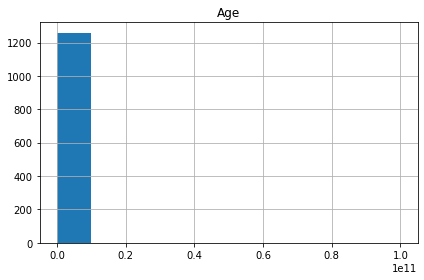

In [3]:
# Using summarize function to see head of dataframe, datatypes, amount of null values, stats, and value_counts
wrangle.summarize(df)

------

# Acquire Key Findings, Takeaways, and Next Steps:
- Good amount of nulls to drop or fill in 
- Choose to change some of the object datatypes to numeric datatype, decide what to drop, or decide what to use in modeling
- columns to encode to numeric datatype: gender, Country, self_employed, family history, treatment, work_interfere, no_employees, remote_work, tech_company, benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys-health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequence
- drop unnecassary columns: state and comments




------

## Data Preparation

In [4]:
# initial prep for object data
strings_df = wrangle.prep_the_strings(df)
strings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    object        
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    object        
 5   family_history             957 non-null    object        
 6   treatment                  957 non-null    object        
 7   work_interfere             957 non-null    object        
 8   no_employees               957 non-null    object        
 9   remote_work                957 non-null    object        
 10  tech_company               957 non-null    object        
 11  benefits                   957 non-null    object        
 12  care_op

In [5]:
# initial prep for encoding objects into integers
encoded_df = wrangle.prep_encode(strings_df)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  957 non-null    datetime64[ns]
 1   age                        957 non-null    int64         
 2   gender                     957 non-null    int64         
 3   country                    957 non-null    object        
 4   self_employed              957 non-null    int64         
 5   family_history             957 non-null    int64         
 6   treatment                  957 non-null    int64         
 7   work_interfere             957 non-null    int64         
 8   company_size               957 non-null    int64         
 9   remote_work                957 non-null    int64         
 10  tech_company               957 non-null    int64         
 11  benefits                   957 non-null    int64         
 12  care_op

**To prep this data before exploration, the following was done:**

|   Feature      | Description    | Encoding |
| :------------- | ----------- | -----------: |
| timestamp	|  Time survey was submitted | - |
| age	| Respondent age  | - |
| gender	| Respondent gender | male:0, female:1, other:2 |
| country	 |  Respondent survey  | Only kept N America and Europe |
| self_employed	 | Whether or not they were self employed | No:0, Yes:1 |
| family_history	| Whether or not they have a family history of mental illness | No:0, Yes:1 |
| treatment	 |  Whether or not they have sought treatment  | No:0, Yes:1 |
|  work_interfere	  |  If the person felt that the mental condition interfered with work | Never:0, Rarely:1, Sometimes:2, Often:3, NA:4 |
| no_employees	| The number of employees in the company or organization  | <5:0, 6-25:1, 26-100:2, 101-500:3, 501-1000:4, >1000:5 |
| remote_work	 | Having remote work (outside of an office) at least 50% of the time | No:0, Yes:1 |
| tech_company	| The employer is primarily a tech company/organization | No:0, Yes:1 |
| benefits  |	Providing mental health benefits by the employer | No:0, Yes:1, Don't know:2 |
| care_options |	Providing options for mental health care by the employer | No:0, Yes:1, Not sure:2 |
| wellness_program	| Discussion about mental health as part of an employee wellness program by the employees | No:0, Yes:1, Don't know:2 |
| seek_help	| Provided resources by the employer to learn more about mental health issues and how to seek help | No:0, Yes:1, Don't know:2 |
| anonymity |	Protecting anonymity if you choose to take advantage of mental health or substance abuse treatment resources | No:0, Yes:1, Don't know:2 |
| leave  |	How easy is it for you to take medical leave for a mental health condition? | Very difficult:0, Somewhat difficult:1, Don't know:2, Somewhat easy:3, Very easy:4 |
| mental-health_consequence |	Having negative consequences caused by discussing a mental health issue with your employer | No:0, Yes:1, Maybe:2 |
| phys-health_consequence	 | Having negative consequences caused by discussing a physical health issue with your employer  | No:0, Yes:1, Maybe:2 |
| coworkers |	Would you be willing to discuss a mental health issue with your coworkers? | No:0, Yes:1, Some of them:2 |
| supervisor	| Would you be willing to discuss a mental health issue with your direct supervisor(s)? | No:0, Yes:1, Some of them:2 |
| mental_health_interview  |	Would you bring up a mental health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| phys_health_interview |	Would you bring up a physical health issue with a potential employer in an interview?  | No:0, Yes:1, Maybe:2 |
| mental_vs_physical |	Do you feel that your employer takes mental health as seriously as physical health? | No:0, Yes:1, Don't know:2 |
|  obs_consequence  |  Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?  | No:0, Yes:1 |

------

### Data Preparation Key Findings, Takeaways, and Next Steps:

- Chose to only include North America and Europe in our dataset: The economic status in these two countries are similar and this will give us more controlled variables with less bias in the data.
- The cleaning process had a moderate amount of nulls that needed to filled in or dropped 
- Deciding on what to fill nulls for each column was dependent on the column we were dealing with as you can see in the cell above.
- Initially decided to not one hot encode: will decide which columns to one hot encode once we find what features are drivers and what features are not.

------

## Data Exploration
### 1st Iteration
The first iteration will be performed on encoded data, before deciding which variables to one-hot encode before the second iteration of data exploration.

### Univariate

In [6]:
# first let's split the data...

# encoded data
encoded_train, encoded_validate, encoded_test = explore.three_split(encoded_df, 'work_interfere')

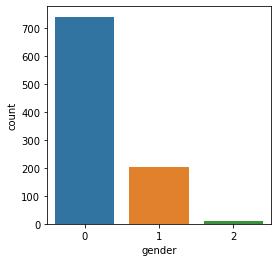

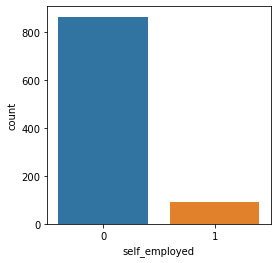

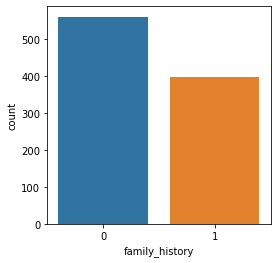

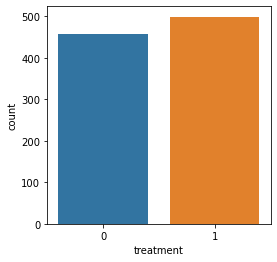

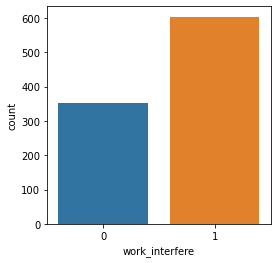

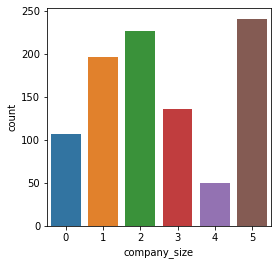

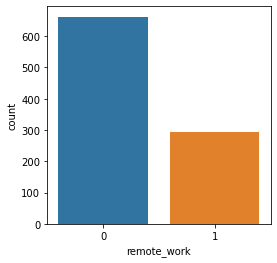

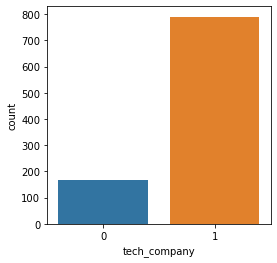

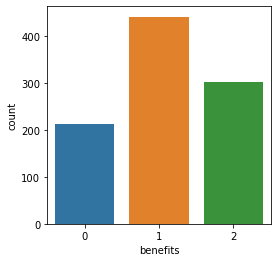

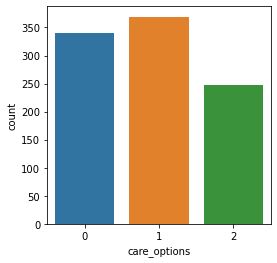

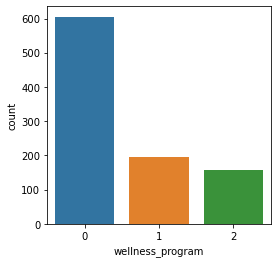

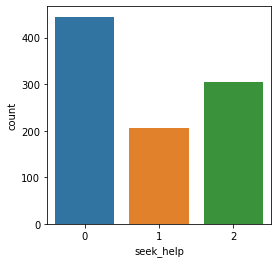

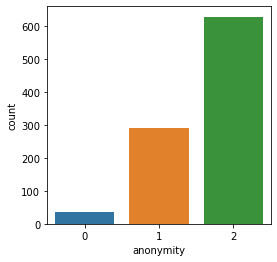

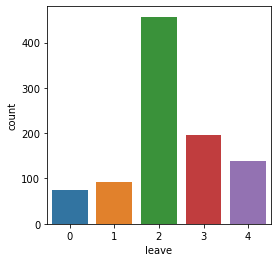

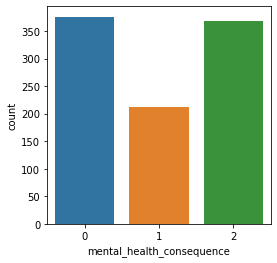

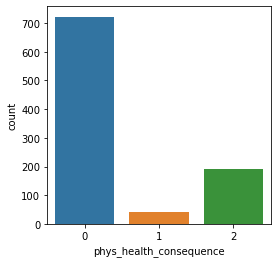

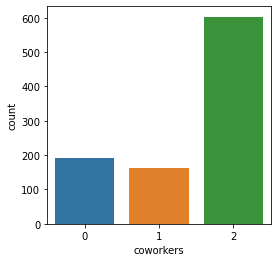

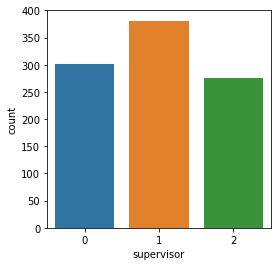

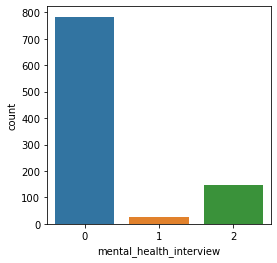

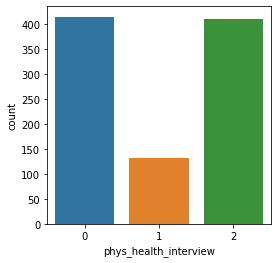

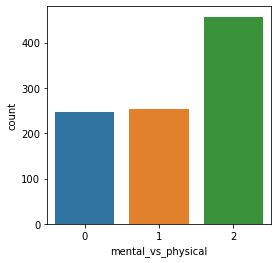

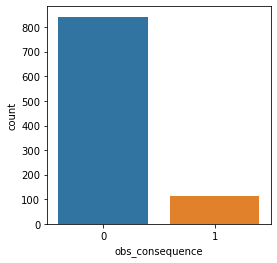

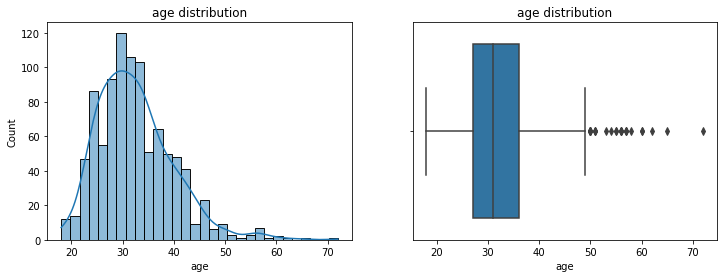

In [7]:
# countplots of categorical variables
# histograms and bosplots of continuous variables
explore.mental_health_univariate(encoded_df)

#### Univariate 1st Iteration - Key Findings, Takeaways, and Next Steps:
- `gender` is heavily imbalanced, with 70% of respondents being male. What kind of impact will this have? Are men more/less likey to seek treatment and/or have mental health issues that lead to workplace interference?
- `self-employed` is also heavily imbalanced, with only 10% reporting being self-employed. Does this group have more/less issues than those working for others?
- `family_history` is 60% no history, 40% history. Interesting to see so many showing a history of mental-illness...(could this be a potential driver???).
- `treatment` is almost evenly split. Will be very interested to see if this is a driver - Does receiving treatement lead to more or less interference?
- `work_interfere` our target variable is split 60-40, will need to explore over/under-sampling methods to improve model accuracy.
- `company_size` has multiple peaks and valleys. It would be nice if the data wasn't already binned, so we could possibly bin differently. Also, clustering might play a role in dealing with company size. It appears there will be a relationship with our target, but what it is, is currently unclear.
- `remote_work` is roughly 70-30, with most people working in office. Becasue this data is pre-covid, it would be really nice to gather additional data during/post-covid to see what changes have occurred.
- `tech_company` represents 80% of our observations, with approx 20% not working in tech. Unclear at this time if we have enough data to make a good comparison between the two groups.
- `benefits` is roughly normally distributed with about half of all observations receiving benefits, one-fifth not receiving any, and one-third unsure if they are available. Really interested to learn more about the 'unsure' group. How do they not know? Are they going to stand out compared to the other two groups?
- `care_options` are almost uniform in distribution. 'Yes' and 'No' each receive a little over one-third of all responses, and 'Don't know' receives just under one-third. Again, we are very interested in the 'Don't know' group. Does it not matter if care is available because they do not have mental health issues? Or, is this a possible sign of a group not receiving preventative measures that could have a potentially large impact?
- `wellness_program` has 60% not having a wellness program, and 20% each either having one, or unsure. Would love to see how this relates to tech vs non-tech jobs, and again, if 'Don't know' is a driver, or just noise.
- `seek_help` has 40% not receiving help/resources from their company, and 30% receiving help, and 20% unsure.
- `anonymity` shows an overwhelming majority of respondents who are unsure if they would be able to remain anonymous.
- `leave` is roughly normally distributed, however most responses are unsure how difficult it would be to take leave due to a mental health issue.
- `mental_health_consequence` shows most either do not think their would be consequences, or are unsure
- `phys_health_consequence` shows a stark contrast to mental...75% have no fear, 5% worry about consequences, and 20% are unsure. We are really interested to see what leads to these differences.
- `coworkers` shows an overwhelming majority are unsure if they would be comfortable speaking with coworkers about personal mental health issues.
- `supervisor` shows another stark contrast where most do feel comfortable speaking with a supervisor about mental health issues, even though they are unsure about speaking with coworkers.
- `mental_health_interview` shows that the overwhelming majority do not feel comfortable bringing up mental health issues in an interview.
- `phys_health_interview` shows that roughly half as many people would be afraid to bring up a physical health issue as a mental one.
- `mental_vs_physical` shows an equal amount of yes and no responses, with a larger portion of unsure. These groups definitely need to be looked into.
- `obs_consequence` shows 90% of observations have not heard of any consequences from coworkers sharing mental health issues.
- `age` is roughly normally distributed around a mean of 32, but has a tail on the upper end. Will be interested interesting to see if we need to bin this data, and how it relates to other variables.

### Bivariate

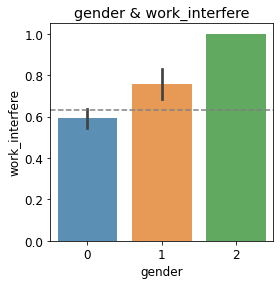


_____________________



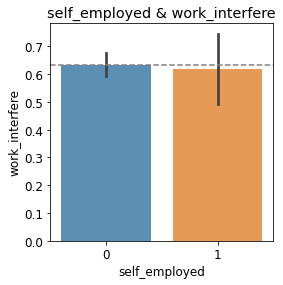


_____________________



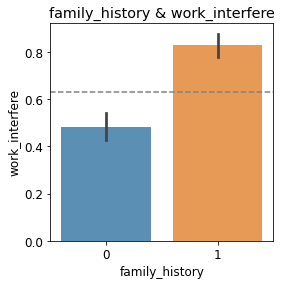


_____________________



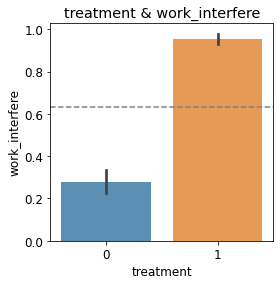


_____________________



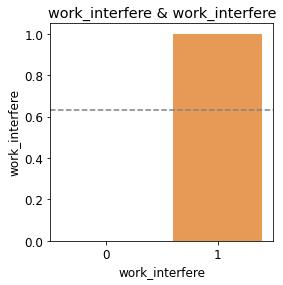


_____________________



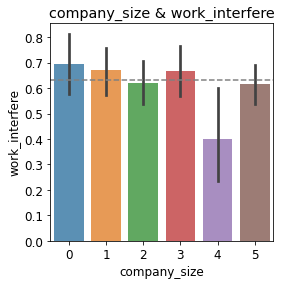


_____________________



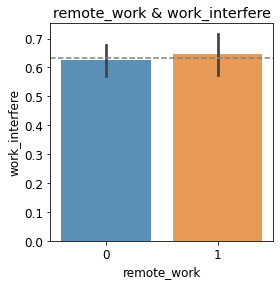


_____________________



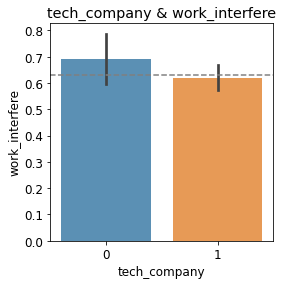


_____________________



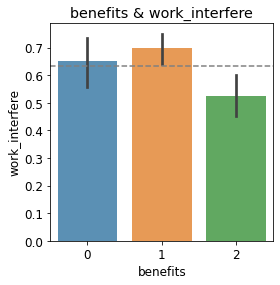


_____________________



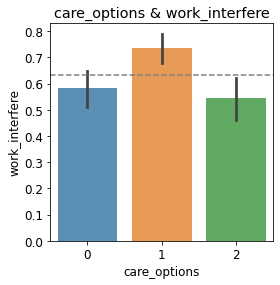


_____________________



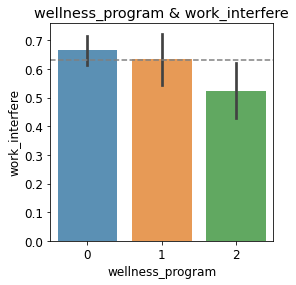


_____________________



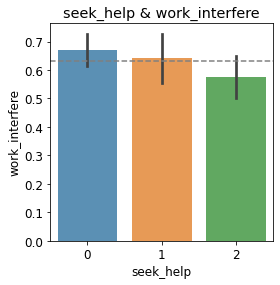


_____________________



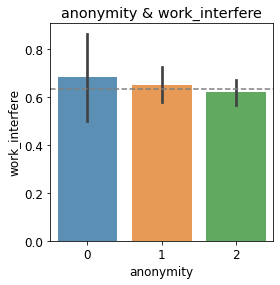


_____________________



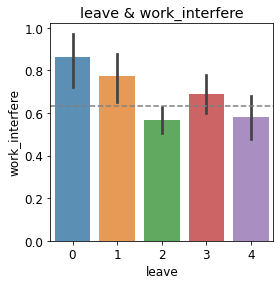


_____________________



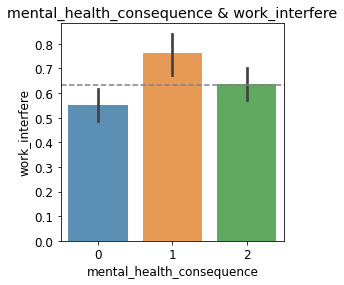


_____________________



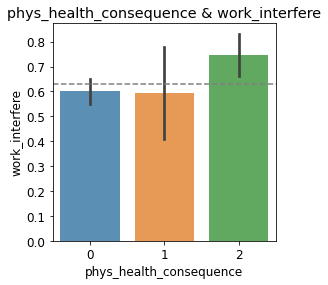


_____________________



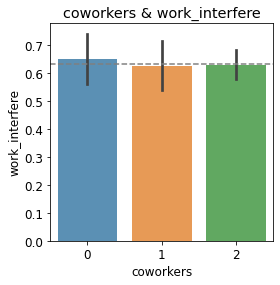


_____________________



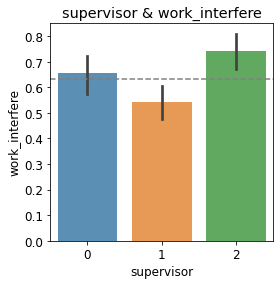


_____________________



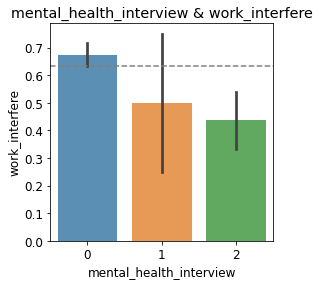


_____________________



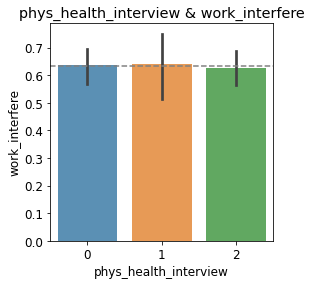


_____________________



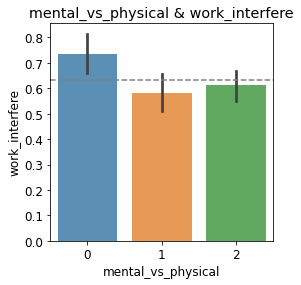


_____________________



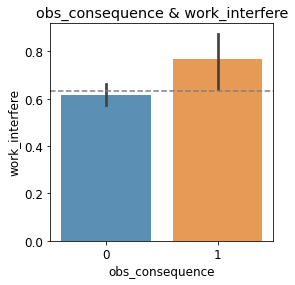


_____________________

age


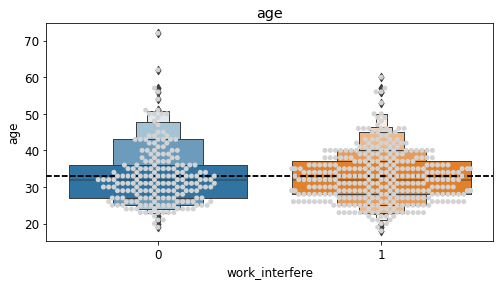

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                     variable    chi2  p-value  degrees of freedom
0              family_history   65.94   0.0000                 1.0
1                   treatment  258.60   0.0000                 1.0
2              work_interfere  530.71   0.0000                 1.0
3     mental_health_interview   18.51   0.0001                 2.0
4                care_options   16.16   0.0003                 2.0
5                  supervisor   15.60   0.0004                 2.0
6   mental_health_consequence   15.41   0.0005                 2.0
7                       leave   19.49   0.0006               

In [8]:
encoded_bi_metrics = explore.mental_health_bivariate(encoded_train, 'work_interfere')

#### Bivariate 1st Iteration - Key Findings, Takeaways, and Next Steps:

### 2nd Iteration
The second iteration will be performed on the one-hot encoded data, before deciding what other feature engineering we would like to perform before the third iteration of data exploration.

In [9]:
# one-hot encode the data
hot_df = explore.one_hot(encoded_df)

In [10]:
# split the one-hot encoded data
hot_train, hot_validate, hot_test = explore.three_split(hot_df, 'work_interfere')

In [11]:
hot_df.columns

Index(['age', 'work_interfere', 'gender_0', 'gender_1', 'gender_2',
       'company_size_0', 'company_size_1', 'company_size_2', 'company_size_3',
       'company_size_4', 'company_size_5', 'leave_0', 'leave_1', 'leave_2',
       'leave_3', 'leave_4', 'care_options_0', 'care_options_1',
       'care_options_2', 'benefits_0', 'benefits_1', 'benefits_2',
       'wellness_program_0', 'wellness_program_1', 'wellness_program_2',
       'seek_help_0', 'seek_help_1', 'seek_help_2', 'anonymity_0',
       'anonymity_1', 'anonymity_2', 'mental_health_consequence_0',
       'mental_health_consequence_1', 'mental_health_consequence_2',
       'phys_health_consequence_0', 'phys_health_consequence_1',
       'phys_health_consequence_2', 'coworkers_0', 'coworkers_1',
       'coworkers_2', 'supervisor_0', 'supervisor_1', 'supervisor_2',
       'mental_health_interview_0', 'mental_health_interview_1',
       'mental_health_interview_2', 'phys_health_interview_0',
       'phys_health_interview_1', 'phys

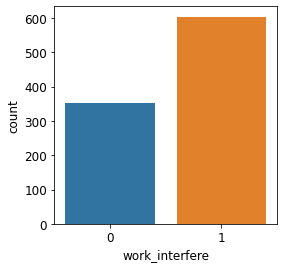

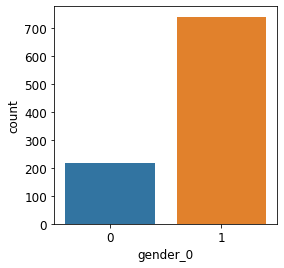

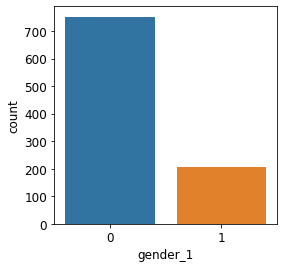

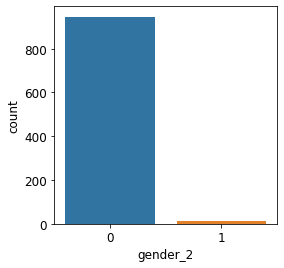

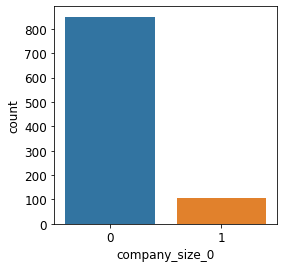

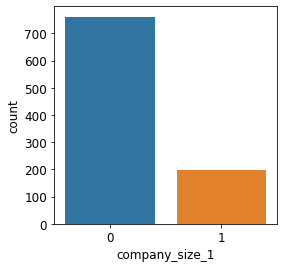

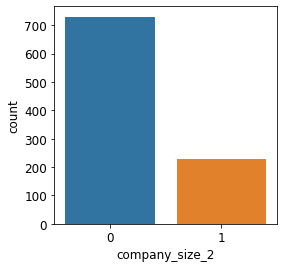

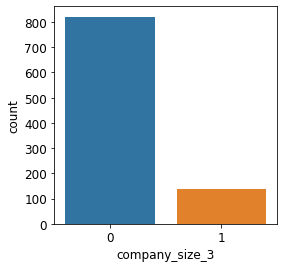

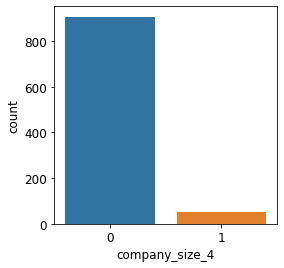

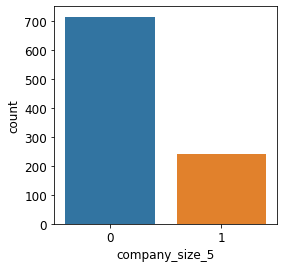

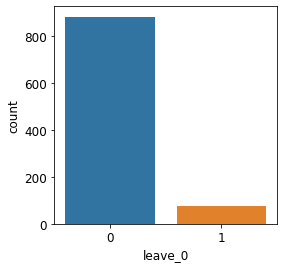

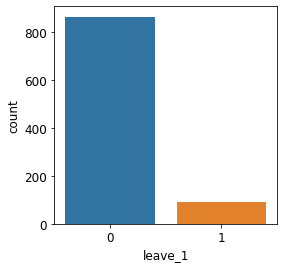

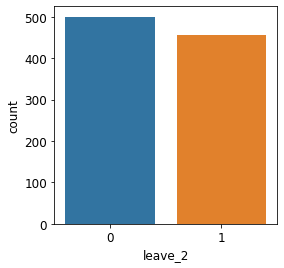

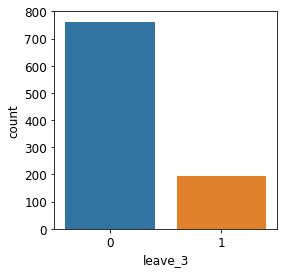

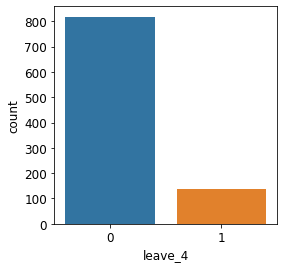

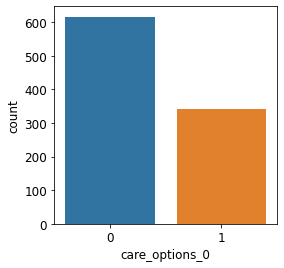

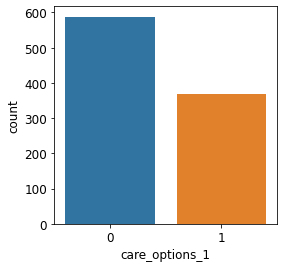

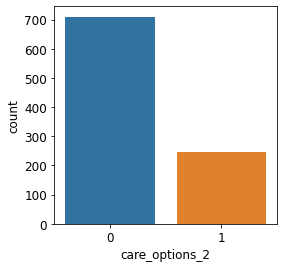

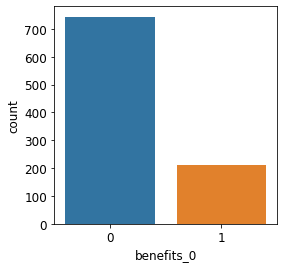

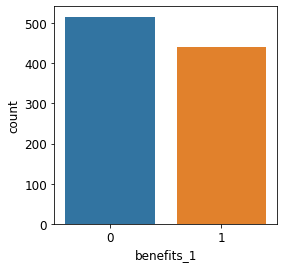

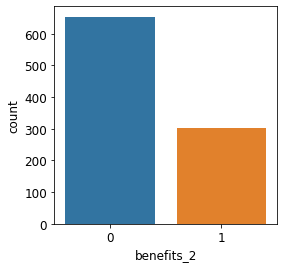

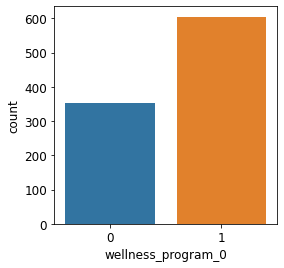

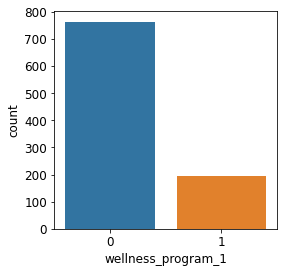

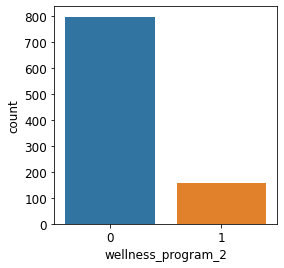

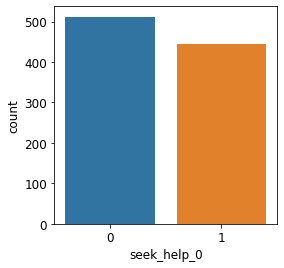

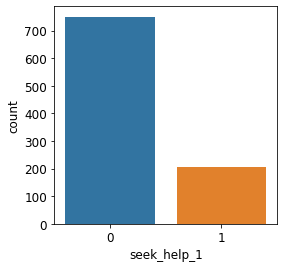

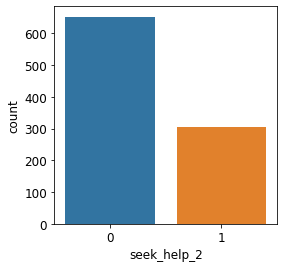

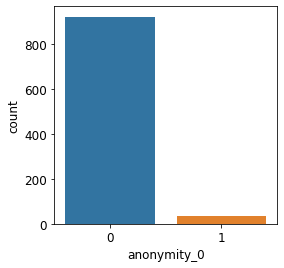

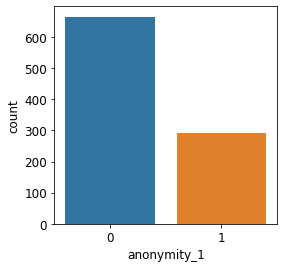

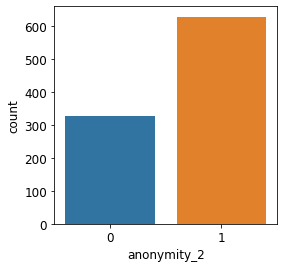

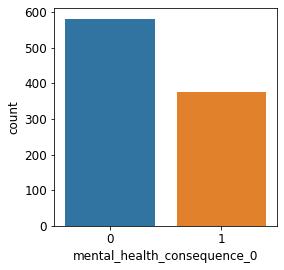

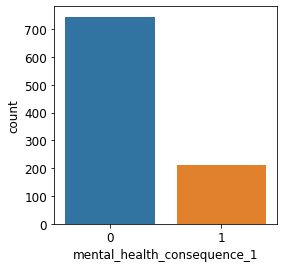

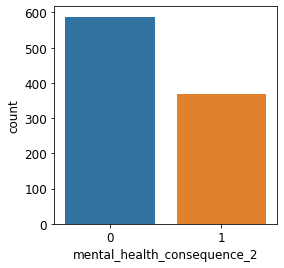

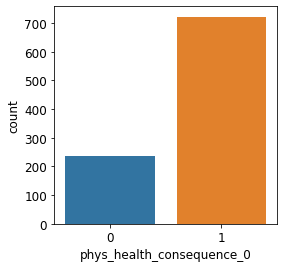

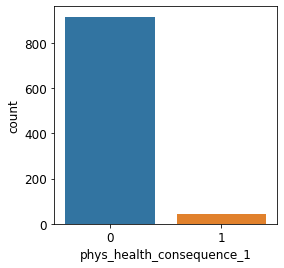

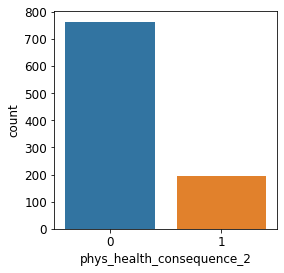

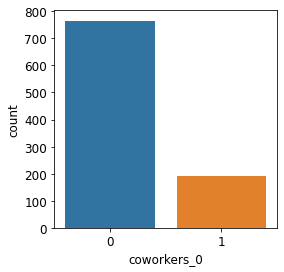

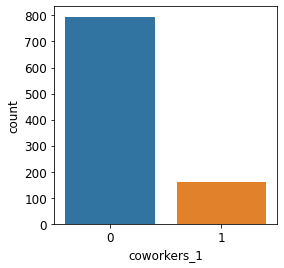

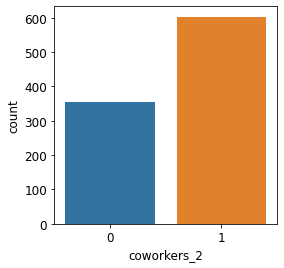

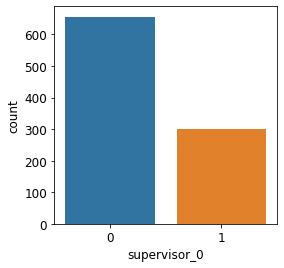

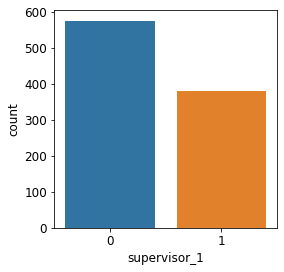

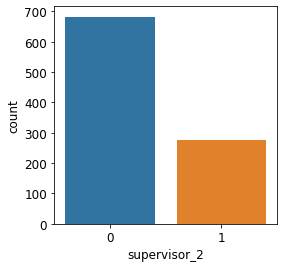

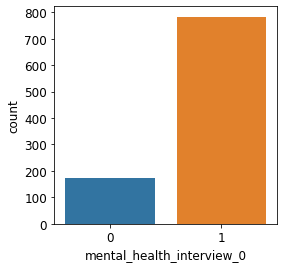

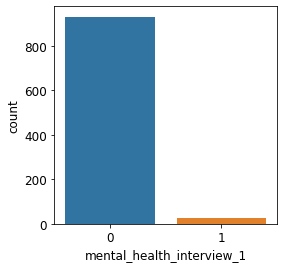

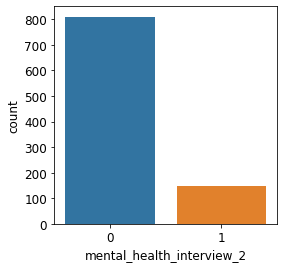

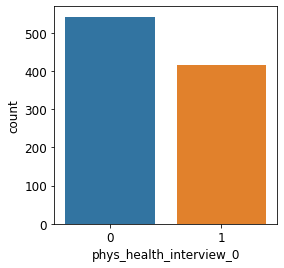

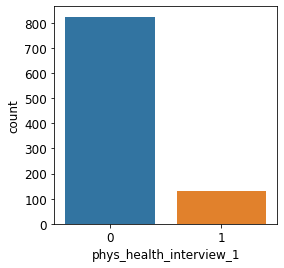

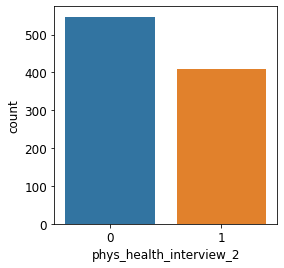

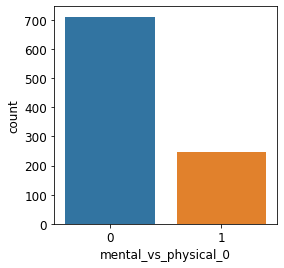

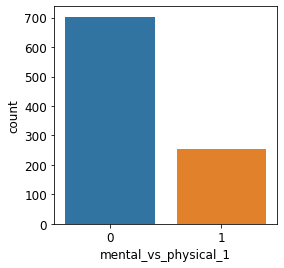

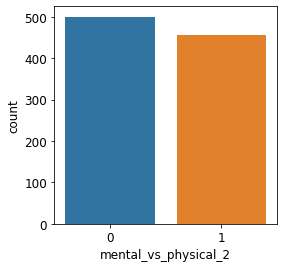

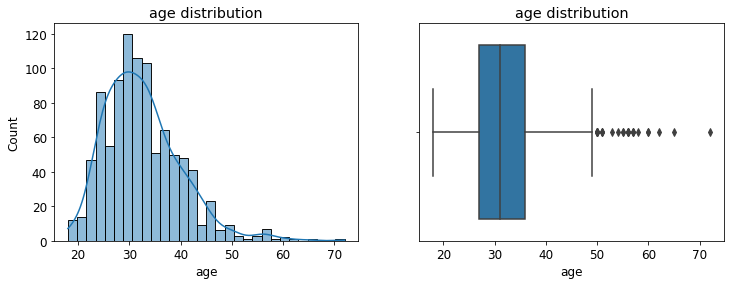

In [12]:
# univariate exploration on one-hot encoded data

explore.mental_health_univariate(hot_df)

#### Univariate 2nd Iteration - Key Findings, Takeaways, and Next Steps:

### Bivariate

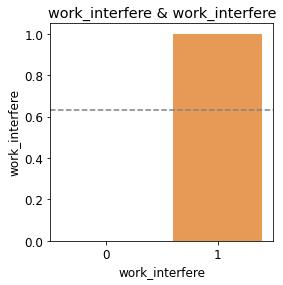


_____________________



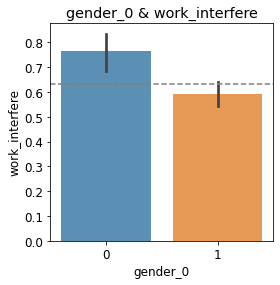


_____________________



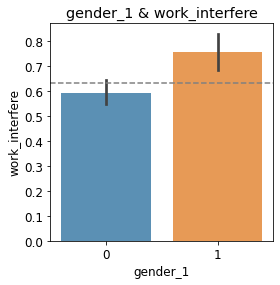


_____________________



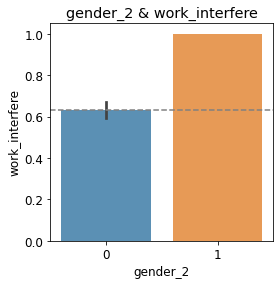


_____________________



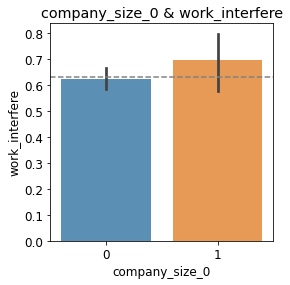


_____________________



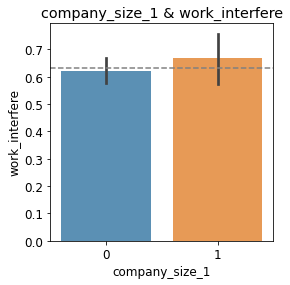


_____________________



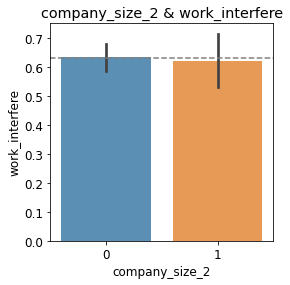


_____________________



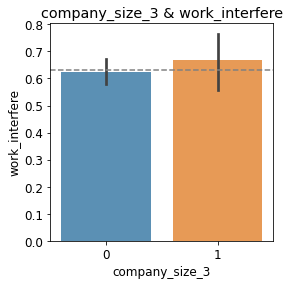


_____________________



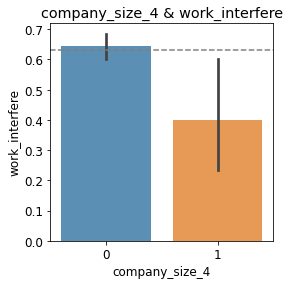


_____________________



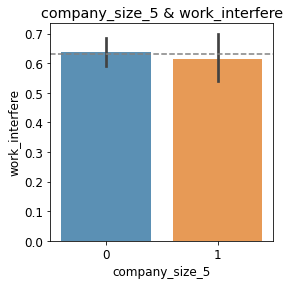


_____________________



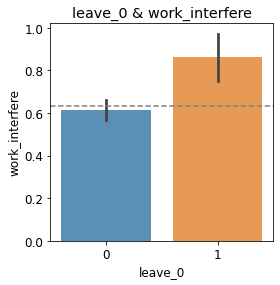


_____________________



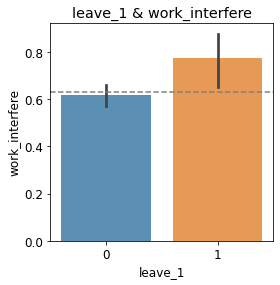


_____________________



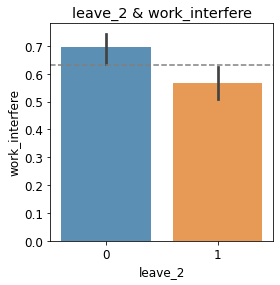


_____________________



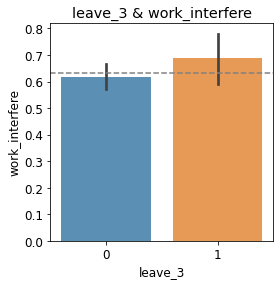


_____________________



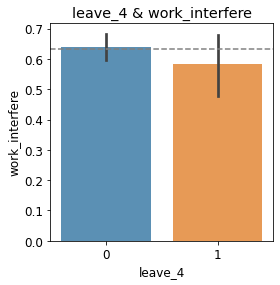


_____________________



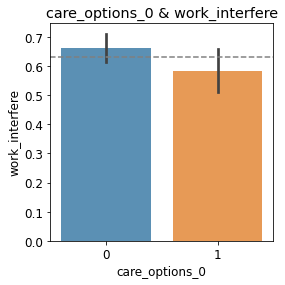


_____________________



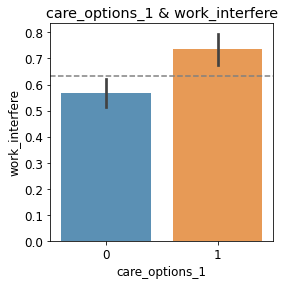


_____________________



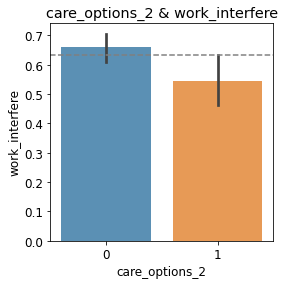


_____________________



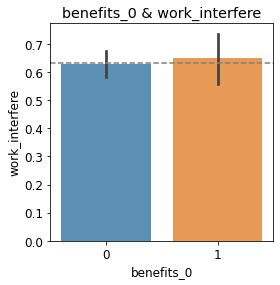


_____________________



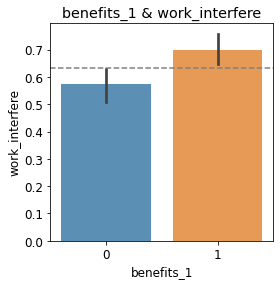


_____________________



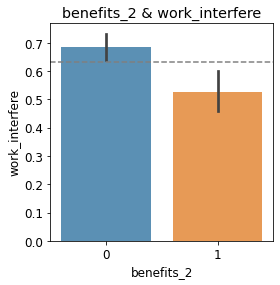


_____________________



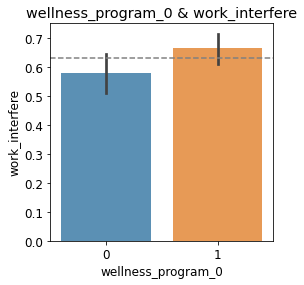


_____________________



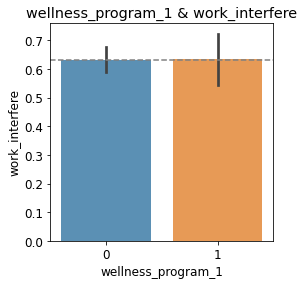


_____________________



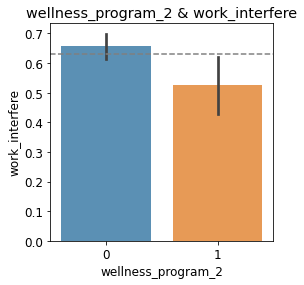


_____________________



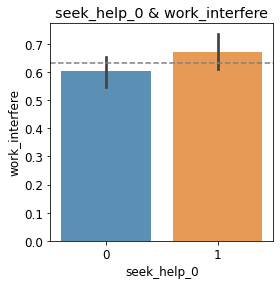


_____________________



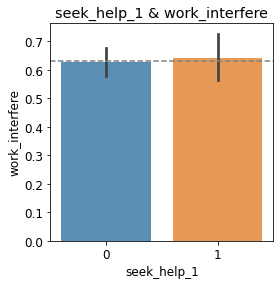


_____________________



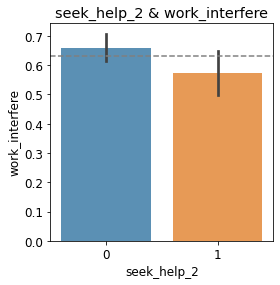


_____________________



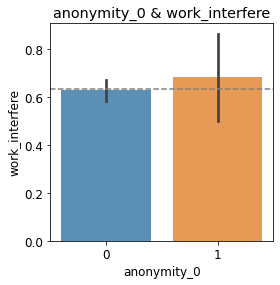


_____________________



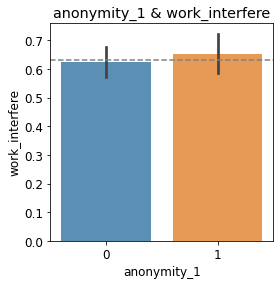


_____________________



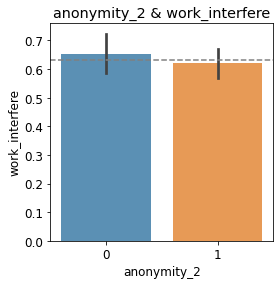


_____________________



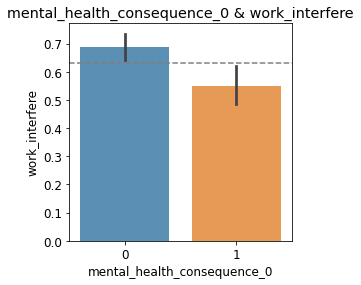


_____________________



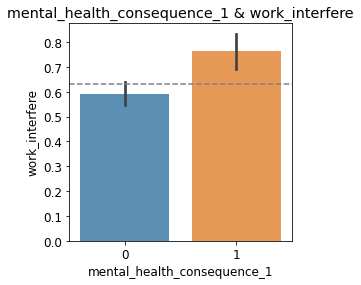


_____________________



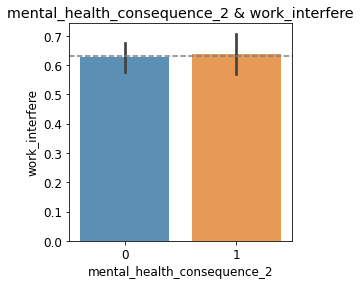


_____________________



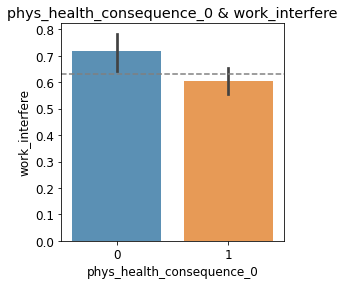


_____________________



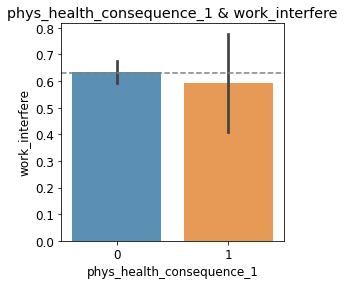


_____________________



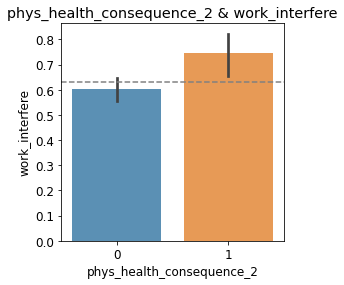


_____________________



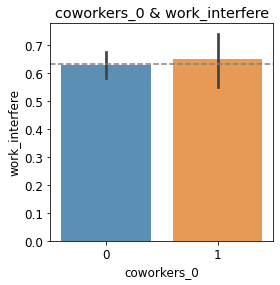


_____________________



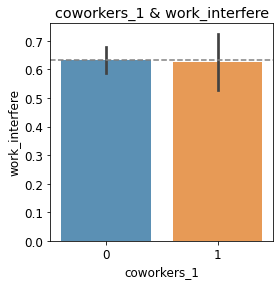


_____________________



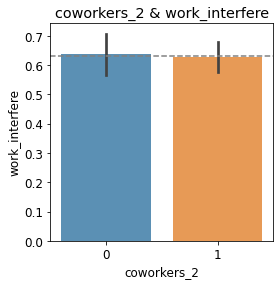


_____________________



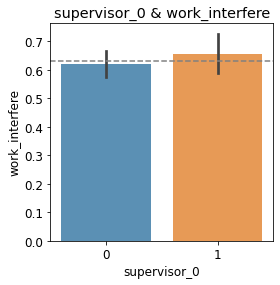


_____________________



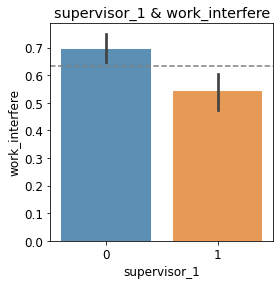


_____________________



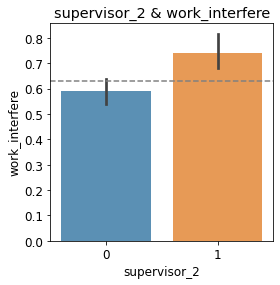


_____________________



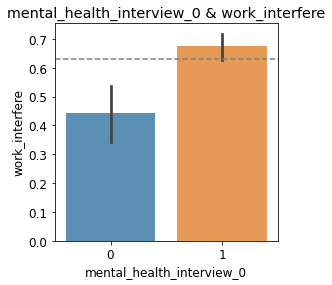


_____________________



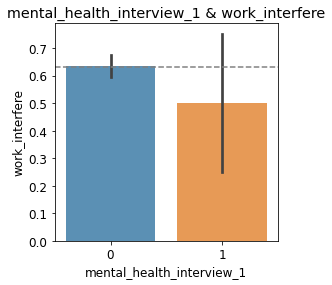


_____________________



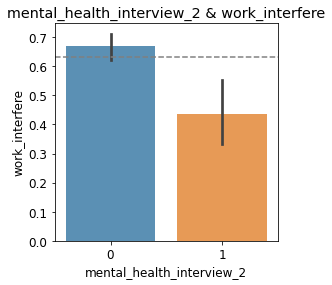


_____________________



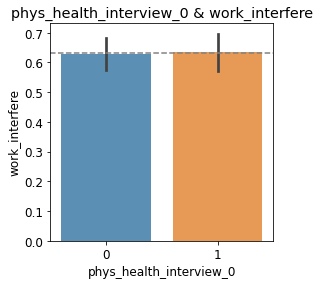


_____________________



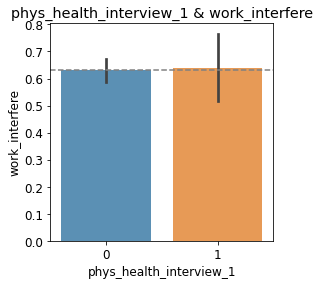


_____________________



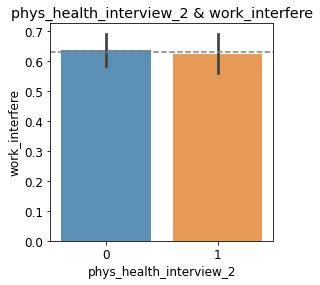


_____________________



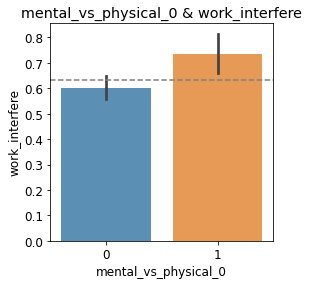


_____________________



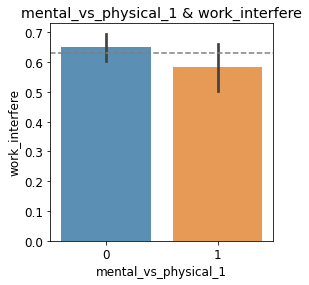


_____________________



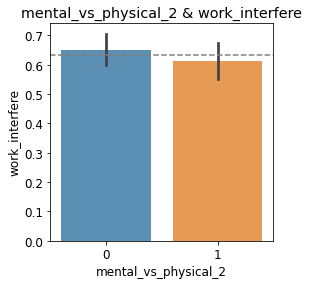


_____________________

age


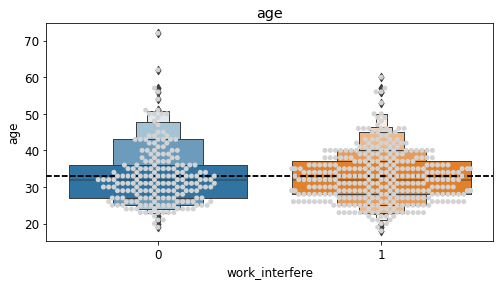

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_0   17.35   0.0000                 1.0
2     mental_health_interview_2   15.99   0.0001                 1.0
3                care_options_1   14.97   0.0001                 1.0
4                  supervisor_1   12.42   0.0004                 1.0
5                    benefits_2   12.19   0.0005                 1.0
6                      gender_0   11.74   0.0006                 1.0
7   mental_health_consequence_1   11.28   0.0

In [13]:
hot_bi_metrics = explore.mental_health_bivariate(hot_train, 'work_interfere')

In [14]:
# one-hot encode the data (drop_first)
hottest_df = explore.two_hot(encoded_df)

In [15]:
# split the one-hot encoded data
hottest_train, hottest_validate, hottest_test = explore.three_split(hottest_df, 'work_interfere')

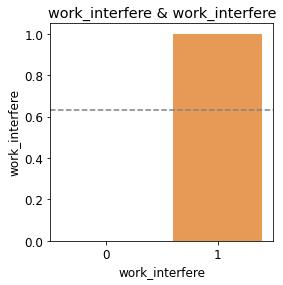


_____________________



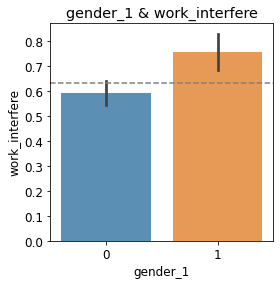


_____________________



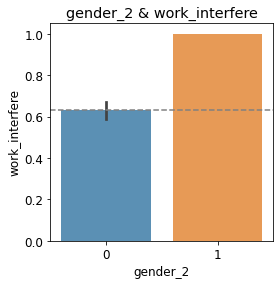


_____________________



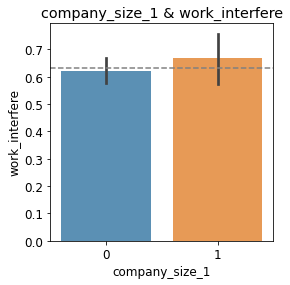


_____________________



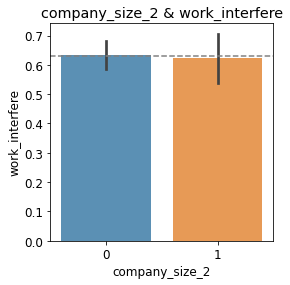


_____________________



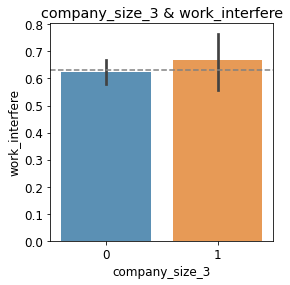


_____________________



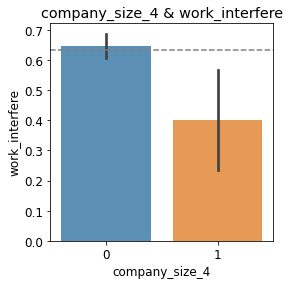


_____________________



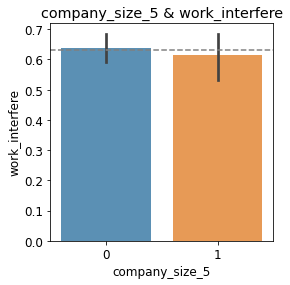


_____________________



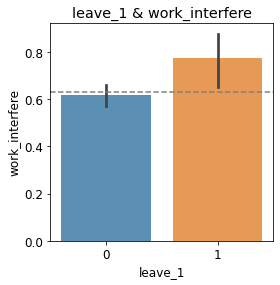


_____________________



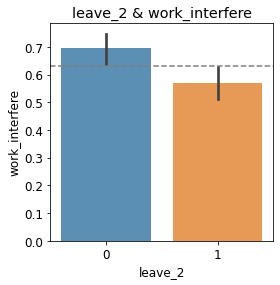


_____________________



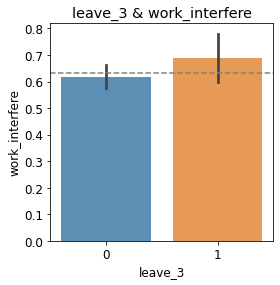


_____________________



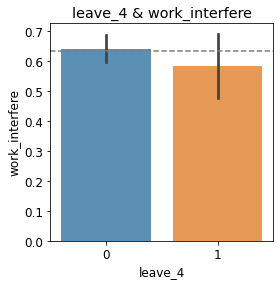


_____________________



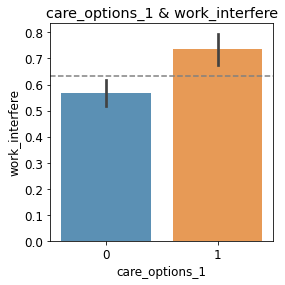


_____________________



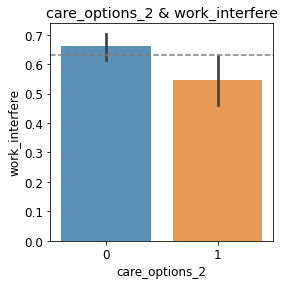


_____________________



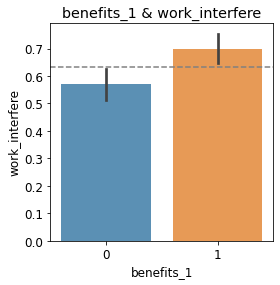


_____________________



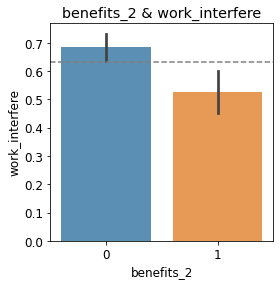


_____________________



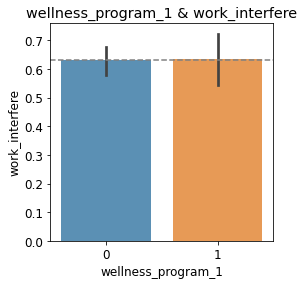


_____________________



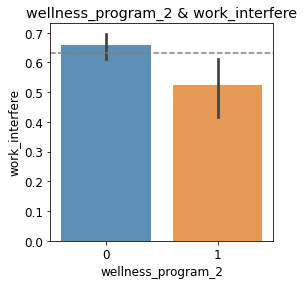


_____________________



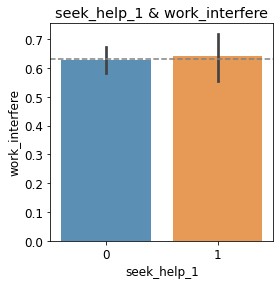


_____________________



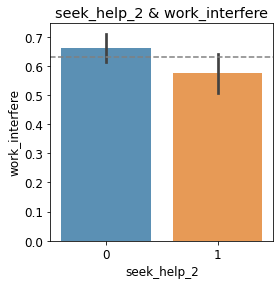


_____________________



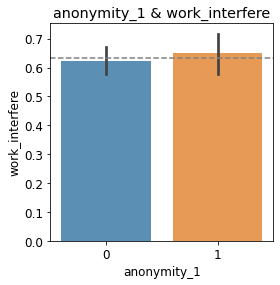


_____________________



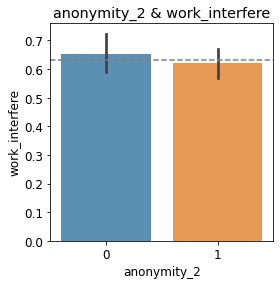


_____________________



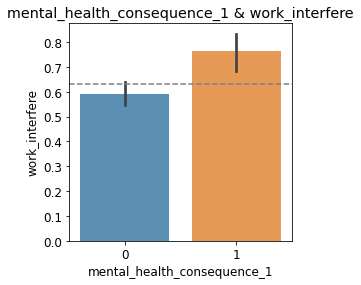


_____________________



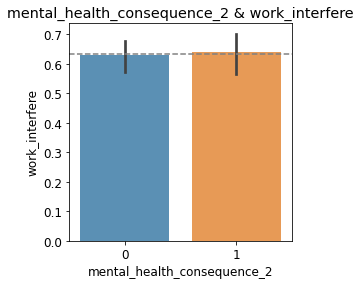


_____________________



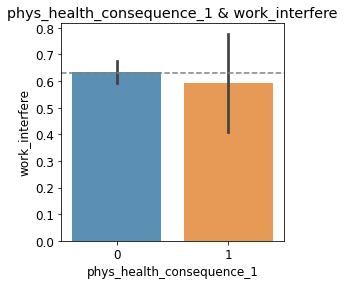


_____________________



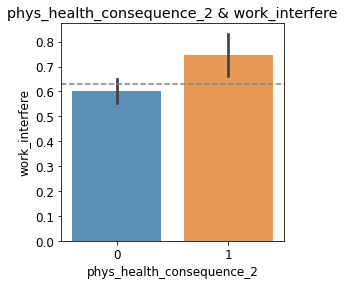


_____________________



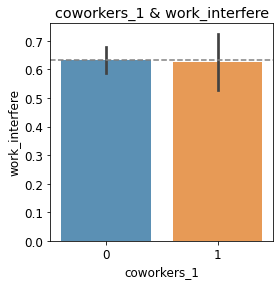


_____________________



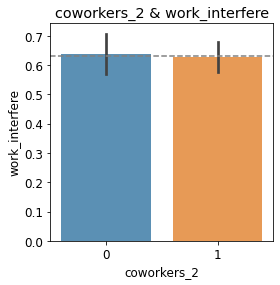


_____________________



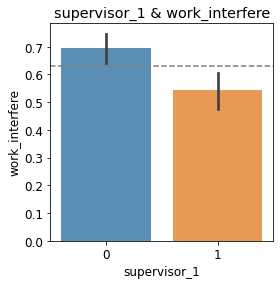


_____________________



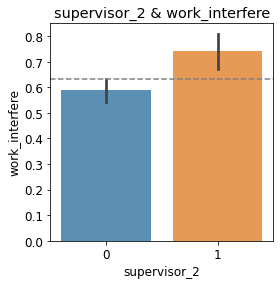


_____________________



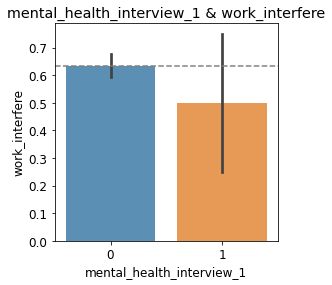


_____________________



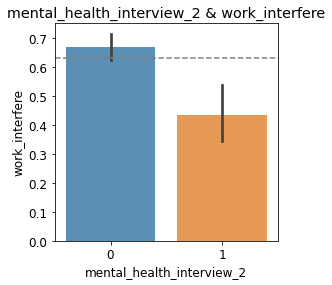


_____________________



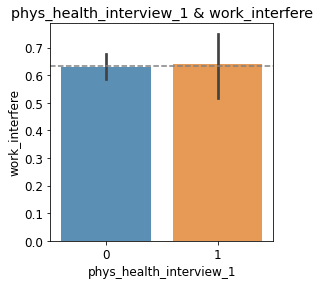


_____________________



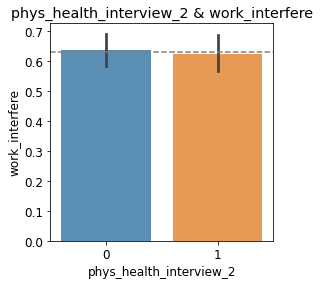


_____________________



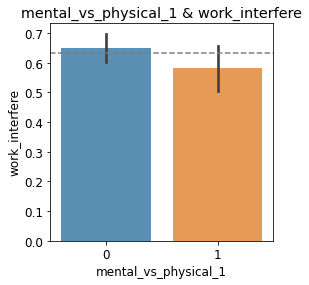


_____________________



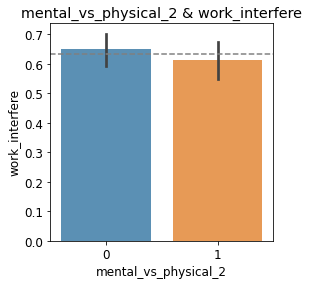


_____________________

age


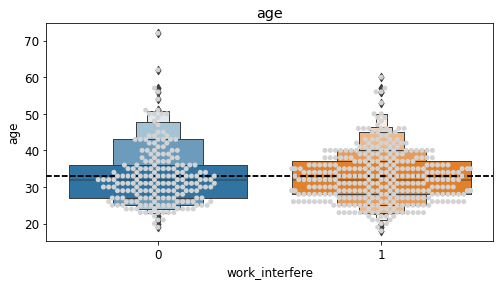

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               197.0  33.025381  8.191233  19.0  27.0  32.0  36.0  72.0
1               338.0  32.801775  7.049574  18.0  28.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=32599.5, pvalue=0.6874668645912754)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  530.71   0.0000                 1.0
1     mental_health_interview_2   15.99   0.0001                 1.0
2                care_options_1   14.97   0.0001                 1.0
3                  supervisor_1   12.42   0.0004                 1.0
4                    benefits_2   12.19   0.0005                 1.0
5   mental_health_consequence_1   11.28   0.0008                 1.0
6                      gender_1   10.37   0.0013                 1.0
7                  supervisor_2    9.85   0.0

In [16]:
hottest_bi_metrics = explore.mental_health_bivariate(hottest_train, 'work_interfere')

In [17]:
# first I am going to limit my exploration to variables with a p-value < 0.1

toppest_df = hottest_bi_metrics[hottest_bi_metrics['p-value']<0.1]

In [18]:
toppest_list = list(toppest_df['variable'])
toppest_list

['work_interfere',
 'mental_health_interview_2',
 'care_options_1',
 'supervisor_1',
 'benefits_2',
 'mental_health_consequence_1',
 'gender_1',
 'supervisor_2',
 'leave_2',
 'benefits_1',
 'phys_health_consequence_2',
 'company_size_4',
 'wellness_program_2',
 'care_options_2',
 'leave_1',
 'seek_help_2']

### Multivariate

In [15]:
# first I am going to limit my exploration to variables with a p-value < 0.1

top_df = hot_bi_metrics[hot_bi_metrics['p-value']<0.1]

In [16]:
top_list = list(top_df['variable'])
top_list

['work_interfere',
 'mental_health_interview_0',
 'mental_health_interview_2',
 'care_options_1',
 'supervisor_1',
 'benefits_2',
 'gender_0',
 'mental_health_consequence_1',
 'gender_1',
 'mental_health_consequence_0',
 'supervisor_2',
 'leave_2',
 'benefits_1',
 'leave_0',
 'phys_health_consequence_2',
 'mental_vs_physical_0',
 'company_size_4',
 'wellness_program_2',
 'care_options_2',
 'phys_health_consequence_0',
 'leave_1',
 'wellness_program_0',
 'seek_help_2',
 'care_options_0']

In [18]:
multi_2 = hot_train[top_list]

In [22]:
col_list = list(multi_2.columns)

for col in col_list:
    print(multi_2[col].value_counts())

1    338
0    197
Name: work_interfere, dtype: int64
1    436
0     99
Name: mental_health_interview_0, dtype: int64
0    448
1     87
Name: mental_health_interview_2, dtype: int64
0    330
1    205
Name: care_options_1, dtype: int64
0    312
1    223
Name: supervisor_1, dtype: int64
0    358
1    177
Name: benefits_2, dtype: int64
1    408
0    127
Name: gender_0, dtype: int64
0    409
1    126
Name: mental_health_consequence_1, dtype: int64
0    411
1    124
Name: gender_1, dtype: int64
0    317
1    218
Name: mental_health_consequence_0, dtype: int64
0    388
1    147
Name: supervisor_2, dtype: int64
0    269
1    266
Name: leave_2, dtype: int64
0    283
1    252
Name: benefits_1, dtype: int64
0    499
1     36
Name: leave_0, dtype: int64
0    428
1    107
Name: phys_health_consequence_2, dtype: int64
0    411
1    124
Name: mental_vs_physical_0, dtype: int64
0    505
1     30
Name: company_size_4, dtype: int64
0    432
1    103
Name: wellness_program_2, dtype: int64
0    401
1    1

In [23]:
work_for_me = hot_df[hot_df['mental_health_interview_0']==1]

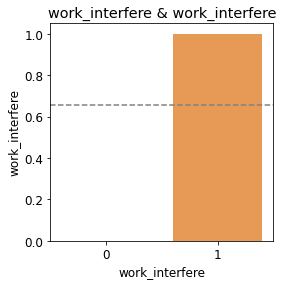


_____________________



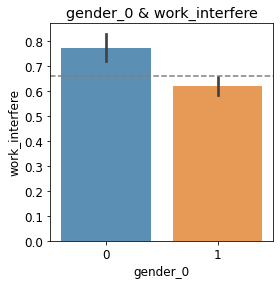


_____________________



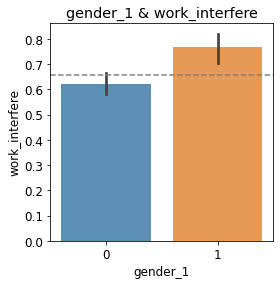


_____________________



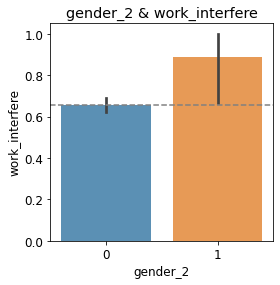


_____________________



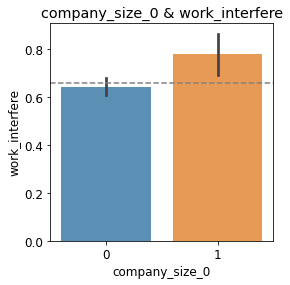


_____________________



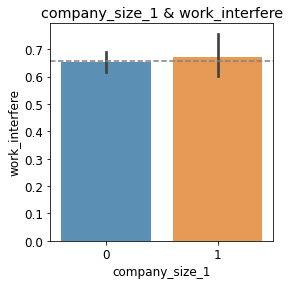


_____________________



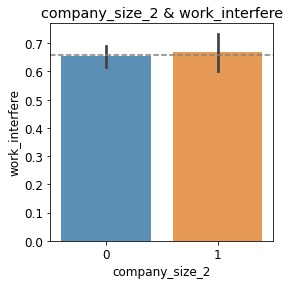


_____________________



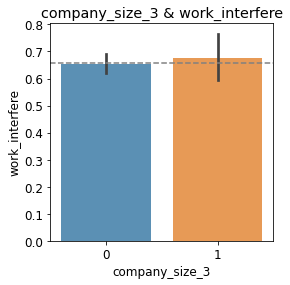


_____________________



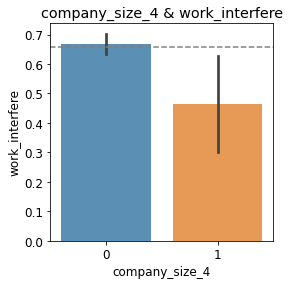


_____________________



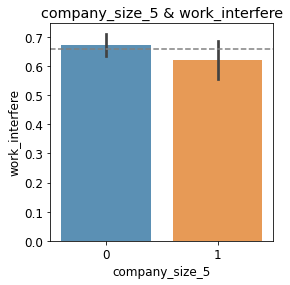


_____________________



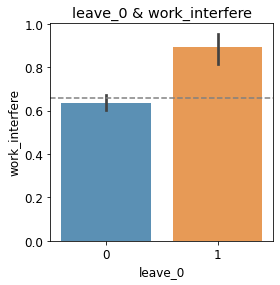


_____________________



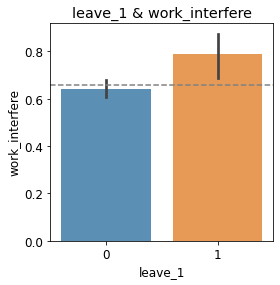


_____________________



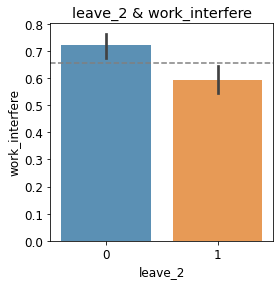


_____________________



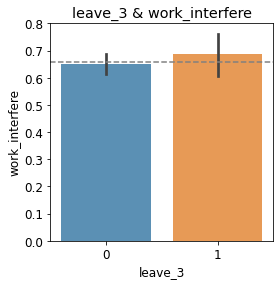


_____________________



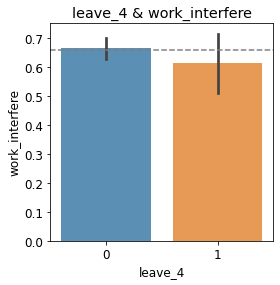


_____________________



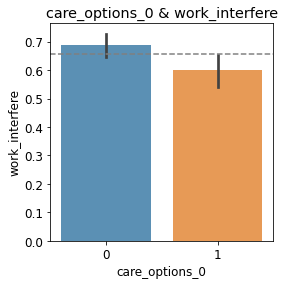


_____________________



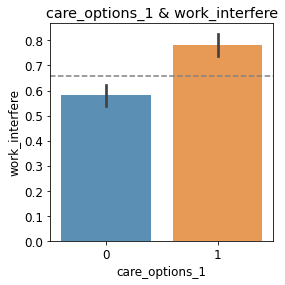


_____________________



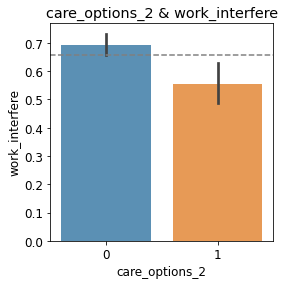


_____________________



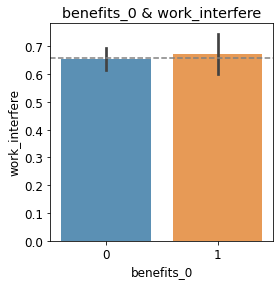


_____________________



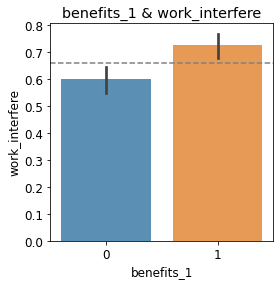


_____________________



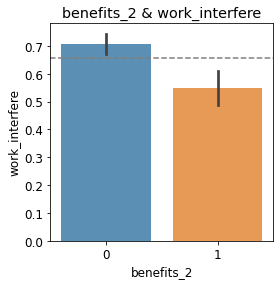


_____________________



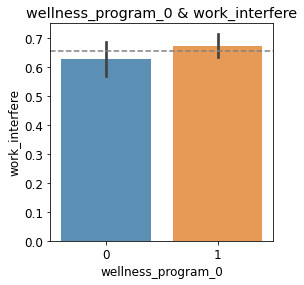


_____________________



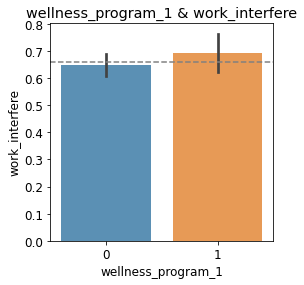


_____________________



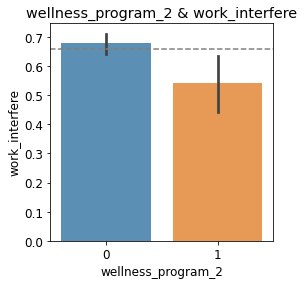


_____________________



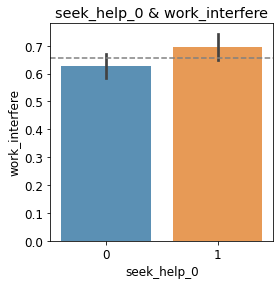


_____________________



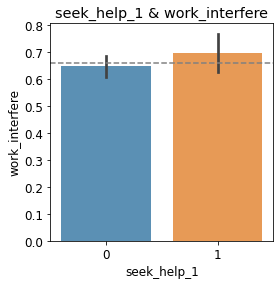


_____________________



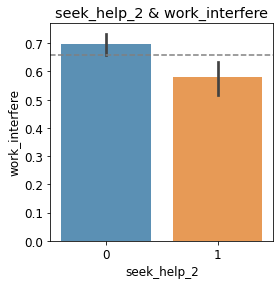


_____________________



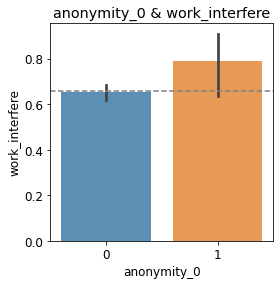


_____________________



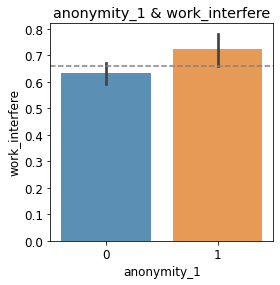


_____________________



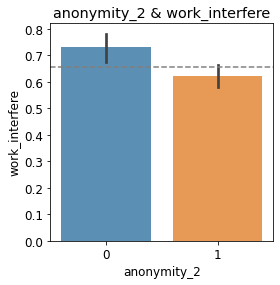


_____________________



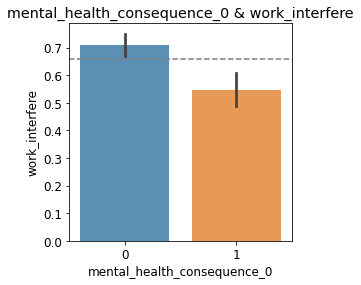


_____________________



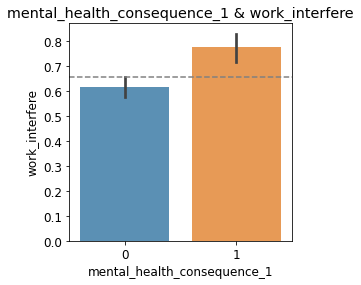


_____________________



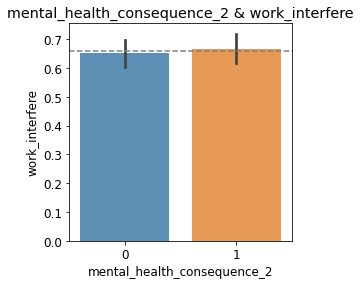


_____________________



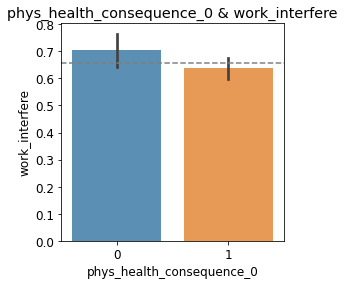


_____________________



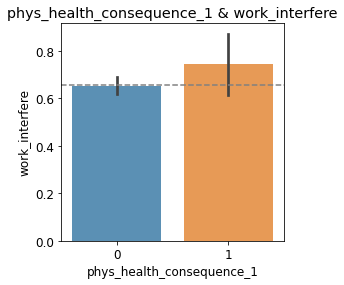


_____________________



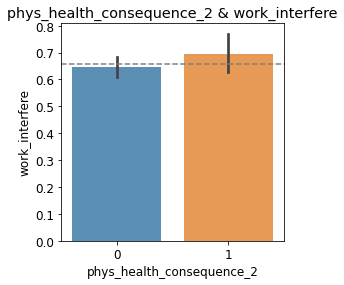


_____________________



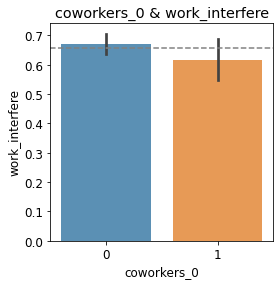


_____________________



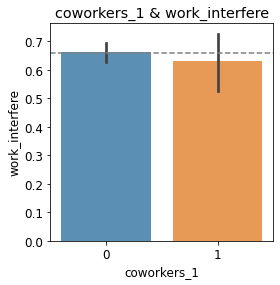


_____________________



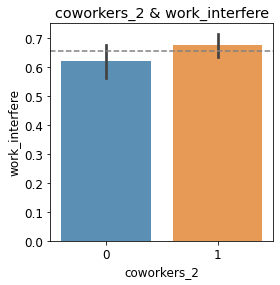


_____________________



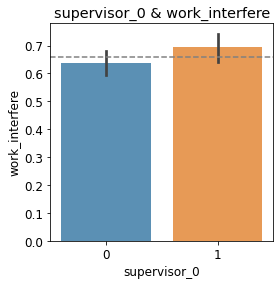


_____________________



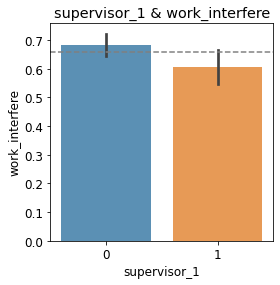


_____________________



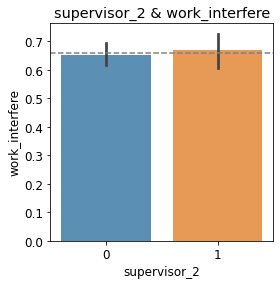


_____________________



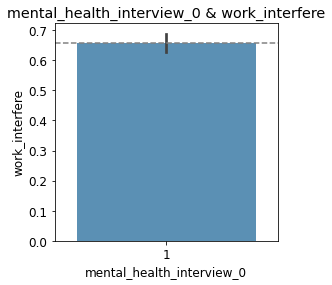


_____________________



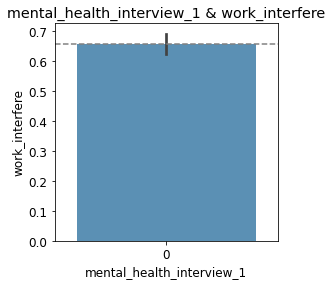


_____________________



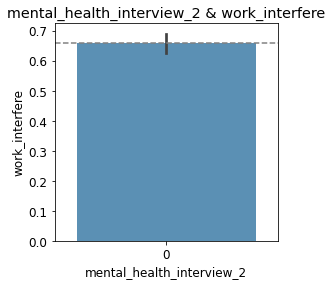


_____________________



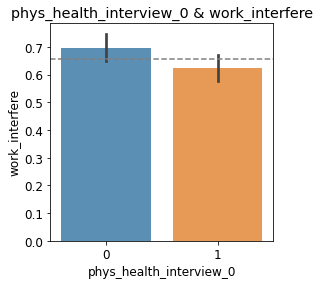


_____________________



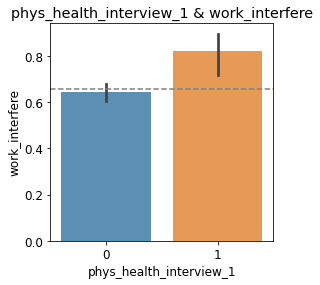


_____________________



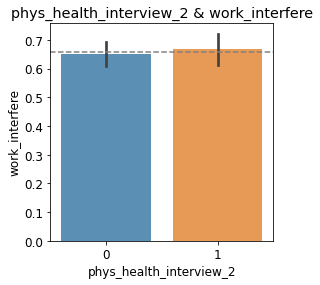


_____________________



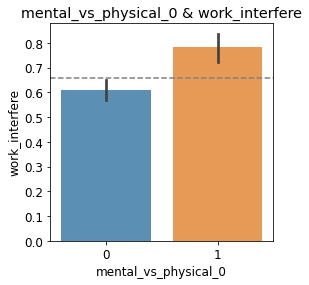


_____________________



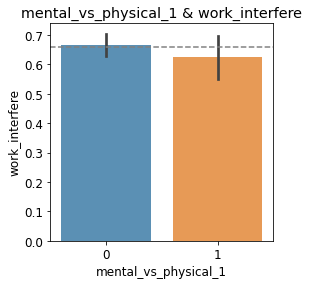


_____________________



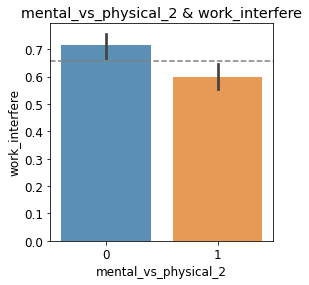


_____________________

age


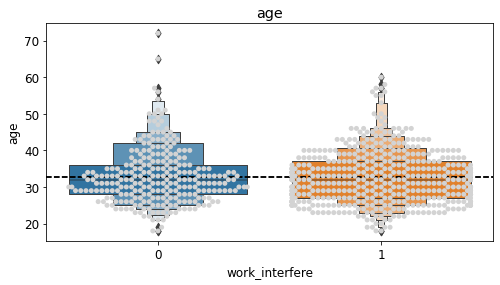

                count       mean       std   min   25%   50%   75%   max
work_interfere                                                          
0               268.0  32.858209  7.757227  18.0  28.0  32.0  36.0  72.0
1               515.0  32.500971  7.163291  18.0  27.0  32.0  37.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=69771.5, pvalue=0.7997245026761224)

____________________

                       variable    chi2  p-value  degrees of freedom
0                work_interfere  778.56   0.0000                 1.0
1   mental_health_consequence_0   18.93   0.0000                 1.0
2                care_options_1   31.42   0.0000                 1.0
3          mental_vs_physical_0   20.63   0.0000                 1.0
4                    benefits_2   18.57   0.0000                 1.0
5   mental_health_consequence_1   16.87   0.0000                 1.0
6                      gender_0   14.89   0.0001                 1.0
7                       leave_0   16.21   0.0

,variable,chi2,p-value,degrees of freedom
0,work_interfere,778.56,0.0000,1.0
1,mental_health_consequence_0,18.93,0.0000,1.0
2,care_options_1,31.42,0.0000,1.0
3,mental_vs_physical_0,20.63,0.0000,1.0
4,benefits_2,18.57,0.0000,1.0
5,mental_health_consequence_1,16.87,0.0000,1.0
6,gender_0,14.89,0.0001,1.0
7,leave_0,16.21,0.0001,1.0
8,leave_2,14.17,0.0002,1.0
9,benefits_1,13.26,0.0003,1.0


In [24]:
explore.mental_health_bivariate(work_for_me, 'work_interfere')

#### Multivariate - Key Findings, Takeaways, and Next Steps:

### Hypothesis Testing
#### Target Variable: 'work_interfere'

#### Hypothesis 1: 'Supervisor'
- alpha : 0.05
- ${H_0}$: The mean workplace interference is the same for those who feel comfortable speaking with their supervisor about mental health issues, and those who do not feel comfortable.
- ${H_a}$: The mean workplace interference is different for those who feel comfortable speaking with their supervisor about mental health issues than those who do not feel comfortable communicating those issues with their supervisor.

In [20]:
# Here is the work for hypothesis 1

observed = pd.crosstab(encoded_train.supervisor, encoded_train.work_interfere)

In [21]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 57 108]
 [102 121]
 [ 38 109]]
---
Expected

[[ 60.75700935 104.24299065]
 [ 82.11401869 140.88598131]
 [ 54.12897196  92.87102804]]
---

chi^2 = 15.5976
p     = 0.0004


#### Hypothesis 1 - Key Findings, Takeaways, and Next Steps:
- Due to our p-value being less than alpha, we reject the null hypothesis.
- There is evidence to suggest a relationship between feeling comfortable speaking with a supervisor about personal mental health issues and our target variable, 'work_interfere'

#### Hypothesis 2: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 2

#### Hypothesis 2 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 3: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

In [ ]:
# Here is the work for hypothesis 3

#### Hypothesis 3 - Key Findings, Takeaways, and Next Steps:
- [insert hypothesis here]
- [reject or fail to reject the null]

#### Hypothesis 4: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 5: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 6: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 7: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 8: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 9: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

#### Hypothesis 10: [insert hypothesis here]
- alpha : 0.05
- ${H_0}$: [insert null hypothesis here]
- ${H_a}$: [insert alternative hypothesis here]

------

### Explore Key Findings, Takeaways, and Next Steps:

------

## Modeling

### Initital Setup

### Model 1: [insert model name here]

#### Model 1: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 2: [insert model name here]

#### Model 2: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 3: [insert model name here]

#### Model 3: [insert model name here] - Key Findings, Takeaways, and Next Steps:

### Model 4: [insert model name here]

#### Model 4: [insert model name here] - Key Findings, Takeaways, and Next Steps:

------

### Modeling Key Findings, Takeaways, and Next Steps:

------

### Summary - Key Findings, Takeaways, and Next Steps:

------